In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

# Importing Libraries and Upoading Data 

In [2]:
import os
import random
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [3]:
labels=["NORMAL","PNEUMONIA"]
img_size = (128,128)
# define a function to get the images from data directory
def get_data(data_dir):
    images=[]
    img_labels=[]
    for label in labels:
#         train/PNEUMONIA
        path = os.path.join(data_dir, label)
        class_labels = labels.index(label)
        for img_name in os.listdir(path):
            
            # Skip non-image files like `.DS_Store`
            if not img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                print(f"Skipping non-image file: {path}")
                continue
            try:
                img_arr = cv2.imread(os.path.join(path, img_name), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size))
                images.append(resized_arr),img_labels.append(class_labels)
            except Exception as e:
                print(e)
    return np.array(images),np.array(img_labels)

In [4]:
train_dir="/kaggle/input/chest-xray-pneumonia/chest_xray/train"
test_dir="/kaggle/input/chest-xray-pneumonia/chest_xray/test"
val_dir="/kaggle/input/chest-xray-pneumonia/chest_xray/val"

In [5]:
train_imgs,train_labels=get_data(train_dir)
test_imgs,test_labels=get_data(test_dir)
val_imgs,val_labels=get_data(val_dir)

In [6]:
# Check shapes
print("Train images shape:", train_imgs.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_imgs.shape)
print("Test labels shape:", test_labels.shape)
print("Validation images shape:", val_imgs.shape)
print("Validation labels shape:", val_labels.shape)

Train images shape: (5216, 128, 128)
Train labels shape: (5216,)
Test images shape: (624, 128, 128)
Test labels shape: (624,)
Validation images shape: (16, 128, 128)
Validation labels shape: (16,)


# Visualizing the pneumonia and normal image

Number of pneumonia images: 3875


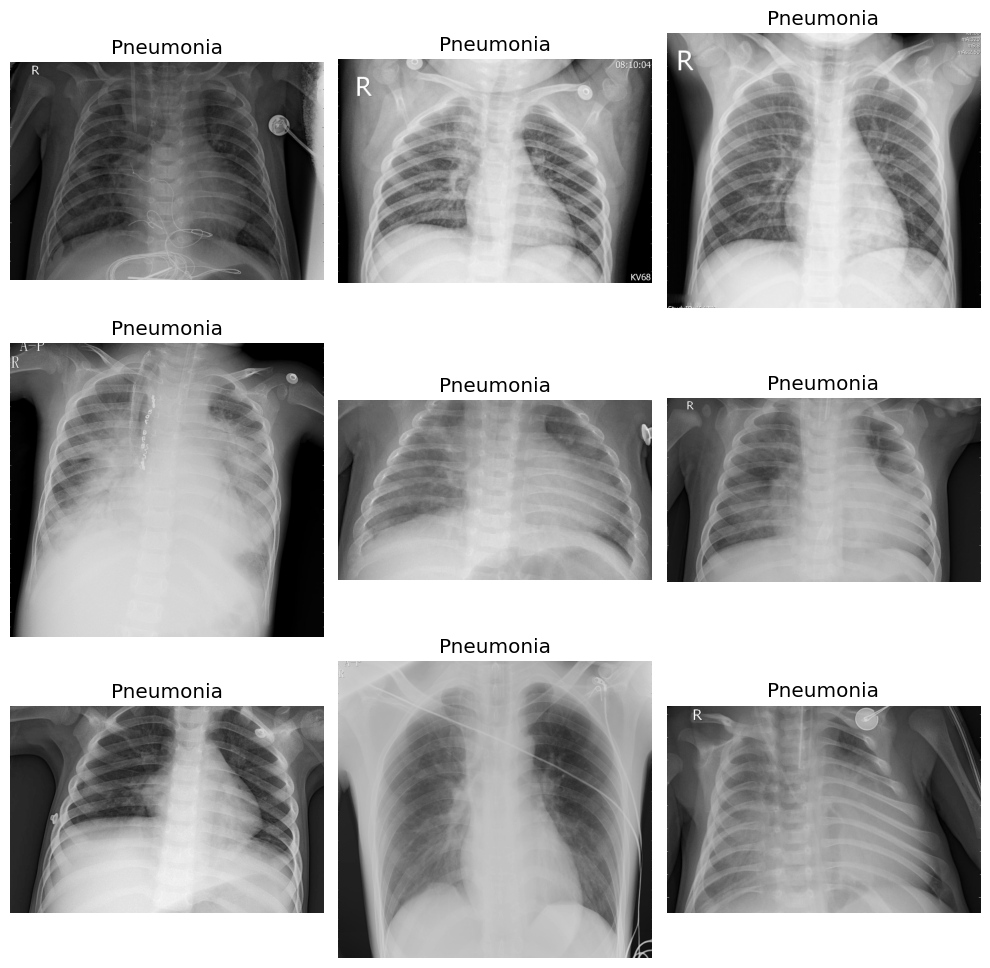

In [7]:
pneumonia_path = os.path.join(train_dir,"PNEUMONIA")
pneumonia_images = [] 
for img_name in os.listdir(pneumonia_path):
    # Construct the full path to each image
    img_path = os.path.join(pneumonia_path, img_name)
     # Load the image in grayscale
    img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    pneumonia_images.append(img_arr)  # Add the path to the list

# Output the number of pneumonia images and sample paths
print(f"Number of pneumonia images: {len(pneumonia_images)}")
# Visualize a few pneumonia images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(pneumonia_images[i], cmap='gray')
    plt.title("Pneumonia")
    plt.axis('off')
plt.tight_layout()
plt.show()

Number of normal images: 1341


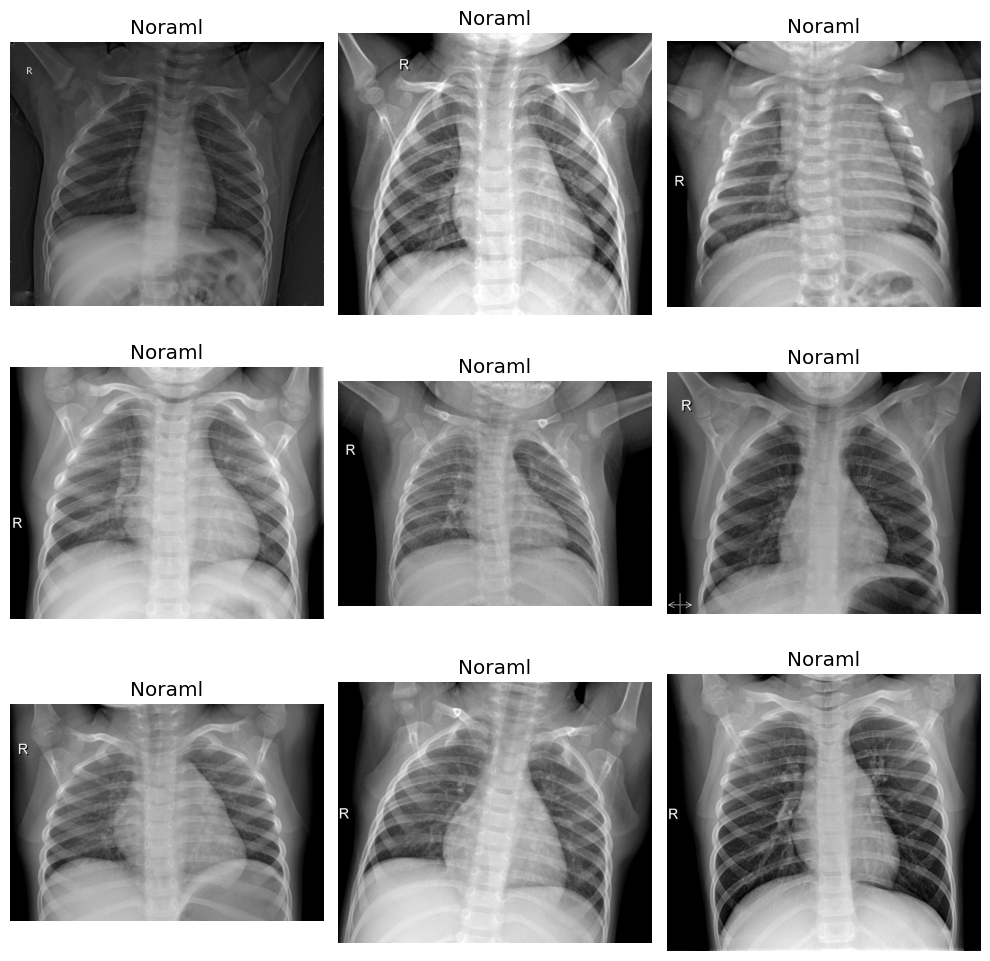

In [8]:
normal_path = os.path.join(train_dir,"NORMAL")
normal_images = [] 
for img_name in os.listdir(normal_path):
    # Construct the full path to each image
    img_path = os.path.join(normal_path, img_name)
     # Load the image in grayscale
    img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    normal_images.append(img_arr)  # Add the path to the list

# Output the number of pneumonia images and sample paths
print(f"Number of normal images: {len(normal_images)}")
# Visualize a few normal images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(normal_images[i], cmap='gray')
    plt.title("Noraml")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Count plot for pneumonia and normal images

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


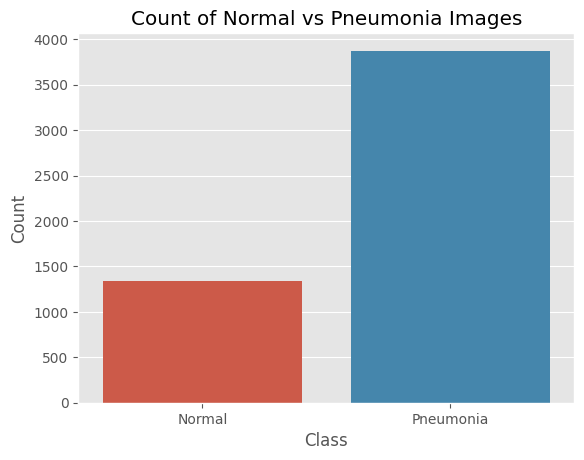

In [9]:
# Count the number of images in each category
normal_count = len(normal_images)
pneumonia_count = len(pneumonia_images)

# Create a list of categories corresponding to each image
categories = ['Normal'] * normal_count + ['Pneumonia'] * pneumonia_count

# Create a countplot
sns.countplot(x=categories)
plt.title('Count of Normal vs Pneumonia Images')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Data Augmentation & Resizing

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D,Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [11]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=0.4,
                                  vertical_flip=0.4,
                                  rotation_range=50,
                                  shear_range=0.2,
                                  width_shift_range=0.4,
                                  height_shift_range=0.4,
                                  fill_mode="nearest")
test_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

In [12]:
train_generator=train_datagen.flow_from_directory("/kaggle/input/chest-xray-pneumonia/chest_xray/train",
                                                  batch_size = 32,
                                 target_size=(128,128),
                                 class_mode = 'categorical',
                                 shuffle=True,
                                 seed = 42,
                                 color_mode = 'rgb')

Found 5216 images belonging to 2 classes.


In [13]:
valid_generator = valid_datagen.flow_from_directory("/kaggle/input/chest-xray-pneumonia/chest_xray/train",
                                 batch_size = 32,
                                 target_size=(128,128),
                                 class_mode = 'categorical',
                                 shuffle=True,
                                 seed = 42,
                                 color_mode = 'rgb')

Found 5216 images belonging to 2 classes.


In [14]:
class_labels = train_generator.class_indices

In [15]:
class_labels

{'NORMAL': 0, 'PNEUMONIA': 1}

In [16]:
class_names={value:key for (key,value) in class_labels.items()}

In [17]:
class_names

{0: 'NORMAL', 1: 'PNEUMONIA'}

# VGG19 CNN Architecture

In [18]:
base_model=VGG19(input_shape=(128,128,3),
                 include_top=False,
                 weights="imagenet")
for layer in base_model.layers:
    layer.trainable=False

x=base_model.output
flat=Flatten()(x)

class_1=Dense(4608,activation="relu")(flat)
dropout=Dropout(0.2)(class_1)
class_2=Dense(1152,activation="relu")(dropout)
output=Dense(2,activation="softmax")(class_2)
model=Model(base_model.inputs,output)
model.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 63,089,602 (240.67 MB)

 Trainable params: 43,065,218 (164.28 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [19]:
file_path = "model.keras"
es = EarlyStopping(monitor="val_loss", verbose=1, mode="min", patience=4)
lrr=ReduceLROnPlateau(monitor="val_accuracy",patience=3,verbose="1",factor=0.5,min_lr="0.0001")
cp=ModelCheckpoint(file_path,monitor="val_loss",save_best_only=True,save_weights_only=False,mode="auto",save_freq="epoch")
sgd = SGD(learning_rate=0.0001, decay = 1e-6, momentum=0.3, nesterov = True)
model.compile(loss="categorical_crossentropy",optimizer=sgd,metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [20]:
history = model.fit(train_generator, 
            steps_per_epoch=50,
            epochs=20, 
            callbacks=[es, cp, lrr],
            validation_data=valid_generator)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.6288 - loss: 0.6783 - val_accuracy: 0.7429 - val_loss: 0.5696 - learning_rate: 1.0000e-04
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.7187 - loss: 0.6005 - val_accuracy: 0.7429 - val_loss: 0.5507 - learning_rate: 1.0000e-04
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.7645 - loss: 0.5275 - val_accuracy: 0.7429 - val_loss: 0.5336 - learning_rate: 1.0000e-04
Epoch 4/20
13/50 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6979 - loss: 0.5761

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


50/50 ━━━━━━━━━━━━━━━━━━━━ 44s 894ms/step - accuracy: 0.7115 - loss: 0.5712 - val_accuracy: 0.7427 - val_loss: 0.5326 - learning_rate: 1.0000e-04
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.7625 - loss: 0.5125 - val_accuracy: 0.7437 - val_loss: 0.5216 - learning_rate: 1.0000e-04
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.7380 - loss: 0.5414 - val_accuracy: 0.7433 - val_loss: 0.5076 - learning_rate: 1.0000e-04
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.7524 - loss: 0.5051 - val_accuracy: 0.7504 - val_loss: 0.5017 - learning_rate: 1.0000e-04
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 43s 869ms/step - accuracy: 0.7544 - loss: 0.5031 - val_accuracy: 0.7481 - val_loss: 0.4953 - learning_rate: 1.0000e-04
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.7562 - loss: 0.5043 - val_accuracy: 0.7435 - val_loss: 0.4821 - learning_rate: 1.0000e-04
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.7526 - loss: 0.4

In [21]:
if not os.path.isdir('model_weights/'):
    os.mkdir("model_weights/")
model.save(filepath = "model_weights/vgg19_model.h5", overwrite=True)